##### Name: Krupal Jadhav
##### ID: 11599514

In [1]:
from igraph import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cairo

# Basic network analysis

In this section we are going to do some basic network analysis. The datasets used for this exercise are:

* The Jazz muscians network 
* The C.elegans metabolic network
* The Higgs Twitter-Soc-Net network
* The Higgs Twitter-Men-Net network
* The Higgs Twitter-Retweet-Net network

Apart from these networks, we will be generating three Erdos-Renyi random networks G(n, p) with parameters 
* n = 2000 and p = 0.01
* n = 2000 and p = 0.005
* n = 2000 and p = 0.0025

### Read graphs

In [2]:
celegans = Graph.Read("celegans_metabolic.net")
jazz = Graph.Read("jazz.net")
higgs_mention = Graph.Read("higgs-mention_network.edgelist")
higgs_social = Graph.Read("higgs-social_network.edgelist")
higgs_retweet = Graph.Read("higgs-retweet_network.edgelist")

### Generate Erdos-Renyi graphs

In [3]:
erdos_renyi_one = Graph.Erdos_Renyi(2000, 0.01)
erdos_renyi_two = Graph.Erdos_Renyi(2000, 0.005)
erdos_renyi_tri = Graph.Erdos_Renyi(2000, 0.0025)

### Report following for all the networks

* Name of the network
* Type, whether the network is directed or undirected
* Number of nodes
* Number of links 
* Number of connected components (Strongly and weakly connected components)
* Maximum degree
* Average path length 
* Diameter
* Average local clustering coefficient
* global clustering coefficient (3 times number of triangles/ number of connected triplets)

In [4]:
# Name of network
Network = [
    "Celegans Metabolic",
    "Jazz",
    "Higgs Mention",
    "Higgs Social",
    "Higgs Retweet",
    "Erdos-Renyi 0.01",
    "Erdos-Renyi 0.005",
    "Erdos-Renyi 0.0025"
]

In [5]:
# Check whether directed of undirected
Type = [
    "Directed" if celegans.is_directed() else "Undirected",
    "Directed" if jazz.is_directed() else "Undirected",
    "Directed" if higgs_mention.is_directed() else "Undirected",
    "Directed" if higgs_social.is_directed() else "Undirected",
    "Directed" if higgs_retweet.is_directed() else "Undirected",
    "Directed" if erdos_renyi_one.is_directed() else "Undirected",
    "Directed" if erdos_renyi_two.is_directed() else "Undirected",
    "Directed" if erdos_renyi_tri.is_directed() else "Undirected"
]   

In [6]:
# Calculate number of nodes
Nodes = [
    celegans.vcount(),
    jazz.vcount(),
    higgs_mention.vcount(),
    higgs_social.vcount(),
    higgs_retweet.vcount(),
    erdos_renyi_one.vcount(),
    erdos_renyi_two.vcount(),
    erdos_renyi_tri.vcount()
]

In [7]:
# Calculate number of links
Links = [
    celegans.ecount(),
    jazz.ecount(),
    higgs_mention.ecount(),
    higgs_social.ecount(),
    higgs_retweet.ecount(),
    erdos_renyi_one.ecount(),
    erdos_renyi_two.ecount(),
    erdos_renyi_tri.ecount()
]

In [8]:
# Number of strongly connected components or just 
# connected components for an undirected graphs
SCC = [
    len(celegans.components(mode=STRONG).sizes()),
    len(jazz.components(mode=STRONG).sizes()),
    len(higgs_mention.components(mode=STRONG).sizes()),
    len(higgs_social.components(mode=STRONG).sizes()),
    len(higgs_retweet.components(mode=STRONG).sizes()),
    len(erdos_renyi_one.components(mode=STRONG).sizes()),
    len(erdos_renyi_two.components(mode=STRONG).sizes()),
    len(erdos_renyi_tri.components(mode=STRONG).sizes())
]

In [9]:
# Number of weakly connected components (only for 
# directed graphs)
WCC = [
    None,
    None,
    len(higgs_mention.components(mode=WEAK).sizes()),
    len(higgs_social.components(mode=WEAK).sizes()),
    len(higgs_retweet.components(mode=WEAK).sizes()),
    None,
    None,
    None
]

In [10]:
# Maximum degree
Degree = [
    celegans.maxdegree(),
    jazz.maxdegree(),
    higgs_mention.maxdegree(),
    higgs_social.maxdegree(),
    higgs_retweet.maxdegree(),
    erdos_renyi_one.maxdegree(),
    erdos_renyi_two.maxdegree(),
    erdos_renyi_tri.maxdegree()
]

In [11]:
# Average path length
Average_Path_Length = [
    celegans.average_path_length(),
    jazz.average_path_length(),
    higgs_mention.average_path_length(),
    None,
    higgs_retweet.average_path_length(),
    erdos_renyi_one.average_path_length(),
    erdos_renyi_two.average_path_length(),
    erdos_renyi_tri.average_path_length()
]

In [12]:
# Diameter
Diameter = [
    celegans.diameter(),
    jazz.diameter(),
    higgs_mention.diameter(),
    None,
    higgs_retweet.diameter(),
    erdos_renyi_one.diameter(),
    erdos_renyi_two.diameter(),
    erdos_renyi_tri.diameter()
]

In [13]:
# Average local clustering coefficient
Avg_Local_Clustering = [
    celegans.transitivity_avglocal_undirected(),
    jazz.transitivity_avglocal_undirected(),
    higgs_mention.transitivity_avglocal_undirected(),
    higgs_social.transitivity_avglocal_undirected(),
    higgs_retweet.transitivity_avglocal_undirected(),
    erdos_renyi_one.transitivity_avglocal_undirected(),
    erdos_renyi_two.transitivity_avglocal_undirected(),
    erdos_renyi_tri.transitivity_avglocal_undirected()
]

In [14]:
# Average global clustering coefficient
Avg_Global_Clustering = [
    celegans.transitivity_undirected(),
    jazz.transitivity_undirected(),
    higgs_mention.transitivity_undirected(),
    higgs_social.transitivity_undirected(),
    higgs_retweet.transitivity_undirected(),
    erdos_renyi_one.transitivity_undirected(),
    erdos_renyi_two.transitivity_undirected(),
    erdos_renyi_tri.transitivity_undirected()
]

In [15]:
report_dict = [
    ('Network', Network),
    ('Type', Type),
    ('Number of nodes', Nodes),
    ('Number of links', Links),
    ('Connected Components (Strong)', SCC),
    ('Connected Components (Weak)', WCC),
    ('Maximum degree', Degree),
    ('Average Path Length', Average_Path_Length),
    ('Diameter', Diameter),
    ('Average Local Clustering Coefficient', Avg_Local_Clustering),
    ('Average Global Clustering Coefficient', Avg_Global_Clustering)
]

In [16]:
report = pd.DataFrame.from_items(report_dict)

/anaconda3/envs/networks/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [17]:
report

,Network,Type,Number of nodes,Number of links,Connected Components (Strong),Connected Components (Weak),Maximum degree,Average Path Length,Diameter,Average Local Clustering Coefficient,Average Global Clustering Coefficient
0,Celegans Metabolic,Undirected,453,4596,1,NaN,634,2.663785,7.0,0.655140,0.124436
1,Jazz,Undirected,198,5484,1,NaN,200,2.235041,6.0,0.633447,0.520259
2,Higgs Mention,Directed,456620,226227,434203,344085.0,138373,2.871898,10.0,0.544523,0.000047
3,Higgs Social,Directed,456627,14855842,91665,157.0,51388,NaN,NaN,0.199380,0.008652
4,Higgs Retweet,Directed,456623,492198,417464,205651.0,311214,2.922859,9.0,0.490133,0.000018
5,Erdos-Renyi 0.01,Undirected,2000,19960,1,NaN,37,2.831636,4.0,0.010213,0.010215
6,Erdos-Renyi 0.005,Undirected,2000,9913,2,NaN,26,3.570000,6.0,0.004200,0.004308
7,Erdos-Renyi 0.0025,Undirected,2000,5005,15,NaN,16,4.891780,10.0,0.003103,0.003225


### Degree distribution for each network

In [250]:
c = celegans.degree_distribution(bin_width=1)
j = jazz.degree_distribution(bin_width=1)
hm = higgs_mention.degree_distribution(bin_width=1)
hs = higgs_social.degree_distribution(bin_width=1)
hr = higgs_retweet.degree_distribution(bin_width=1)
e1 = erdos_renyi_one.degree_distribution(bin_width=1)
e2 = erdos_renyi_two.degree_distribution(bin_width=1)
e3 = erdos_renyi_tri.degree_distribution(bin_width=1)

In [251]:
x_c = [i[2] for i in list(c.bins())]
y_c = [s * 1.0/c.n for s in x_c]

x_j = [i[2] for i in list(j.bins())]
y_j = [s * 1.0/j.n for s in x_j]

x_hm = [i[2] for i in list(hm.bins())]
y_hm = [s * 1.0/hm.n for s in x_hm]

x_hs = [i[2] for i in list(hs.bins())]
y_hs = [s * 1.0/hs.n for s in x_hs]

x_hr = [i[2] for i in list(hr.bins())]
y_hr = [s * 1.0/hr.n for s in x_hr]

x_e1 = [i[2] for i in list(e1.bins())]
y_e1 = [s * 1.0/e1.n for s in x_e1]

x_e2 = [i[2] for i in list(e2.bins())]
y_e2 = [s * 1.0/e2.n for s in x_e2]

x_e3 = [i[2] for i in list(e3.bins())]
y_e3 = [s * 1.0/e3.n for s in x_e3]

Text(0.5,1,'Erdos-Renyi 0.0025 Degree Distribution')

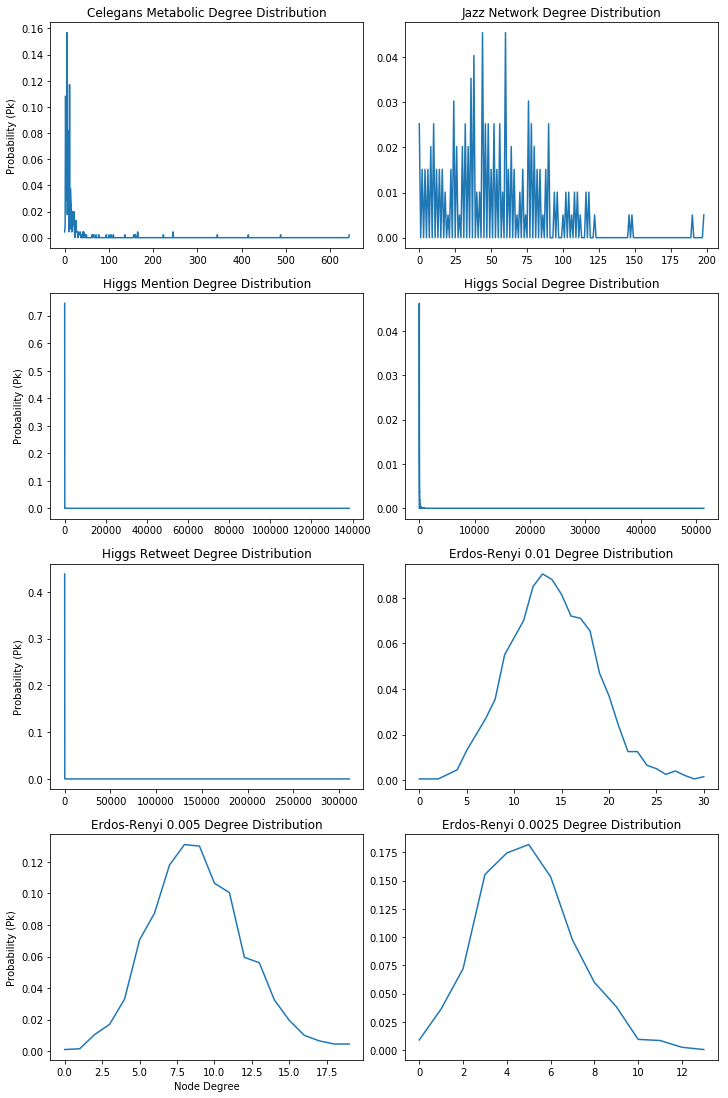

In [277]:
f, arr = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
f.tight_layout()
plt.subplots_adjust(hspace=0.2)
arr[0][0].plot(y_c)
arr[0][0].set_ylabel("Probability (Pk)")
arr[0][0].set_title("Celegans Metabolic Degree Distribution")

arr[0][1].plot(y_j)
arr[0][1].set_title("Jazz Network Degree Distribution")

arr[1][0].plot(y_hm)
arr[1][0].set_ylabel("Probability (Pk)")
arr[1][0].set_title("Higgs Mention Degree Distribution")

arr[1][1].plot(y_hs)
arr[1][1].set_title("Higgs Social Degree Distribution")

arr[2][0].plot(y_hr)
arr[2][0].set_ylabel("Probability (Pk)")
arr[2][0].set_title("Higgs Retweet Degree Distribution")

arr[2][1].plot(y_e1)
arr[2][1].set_title("Erdos-Renyi 0.01 Degree Distribution")

arr[3][0].plot(y_e2)
arr[3][0].set_ylabel("Probability (Pk)")
arr[3][0].set_xlabel("Node Degree")
arr[3][0].set_title("Erdos-Renyi 0.005 Degree Distribution")

arr[3][1].plot(y_e3)
arr[3][0].set_xlabel("Node Degree")
arr[3][1].set_title("Erdos-Renyi 0.0025 Degree Distribution")

As we can see from the above graphs, the real word networks are having a power law distribution whereas all the Erdos-Renyi random graphs have a degree distribution which is normally distributed. The reason for normal distribution can be that we have manually specified what will be probability of any two nodes having an edge between them whereas, this is not the case with real world networks.

### Path length distribution

In [382]:
c = celegans.path_length_hist()
j = jazz.path_length_hist()
hm = higgs_mention.path_length_hist()
hs = higgs_social.path_length_hist()
hr = higgs_retweet.path_length_hist()
e1 = erdos_renyi_one.path_length_hist()
e2 = erdos_renyi_two.path_length_hist()
e3 = erdos_renyi_tri.path_length_hist()

In [390]:
x_c = [i[2] for i in list(c.bins())]
y_c = [i for i in range(len(x_c))]

x_j = [i[2] for i in list(j.bins())]
y_j = [i for i in range(len(x_j))]

x_hm = [i[2] for i in list(hm.bins())]
y_hm = [i for i in range(len(x_hm))]

x_hs = [i[2] for i in list(hs.bins())]
y_hs = [i for i in range(len(x_hs))]

x_hr = [i[2] for i in list(hr.bins())]
y_hr = [i for i in range(len(x_hr))]

x_e1 = [i[2] for i in list(e1.bins())]
y_e1 = [i for i in range(len(x_e1))]

x_e2 = [i[2] for i in list(e2.bins())]
y_e2 = [i for i in range(len(x_e2))]

x_e3 = [i[2] for i in list(e3.bins())]
y_e3 = [i for i in range(len(x_e3))]

Text(0.5,1,'Erdos-Renyi 0.0025 Path length Distribution')

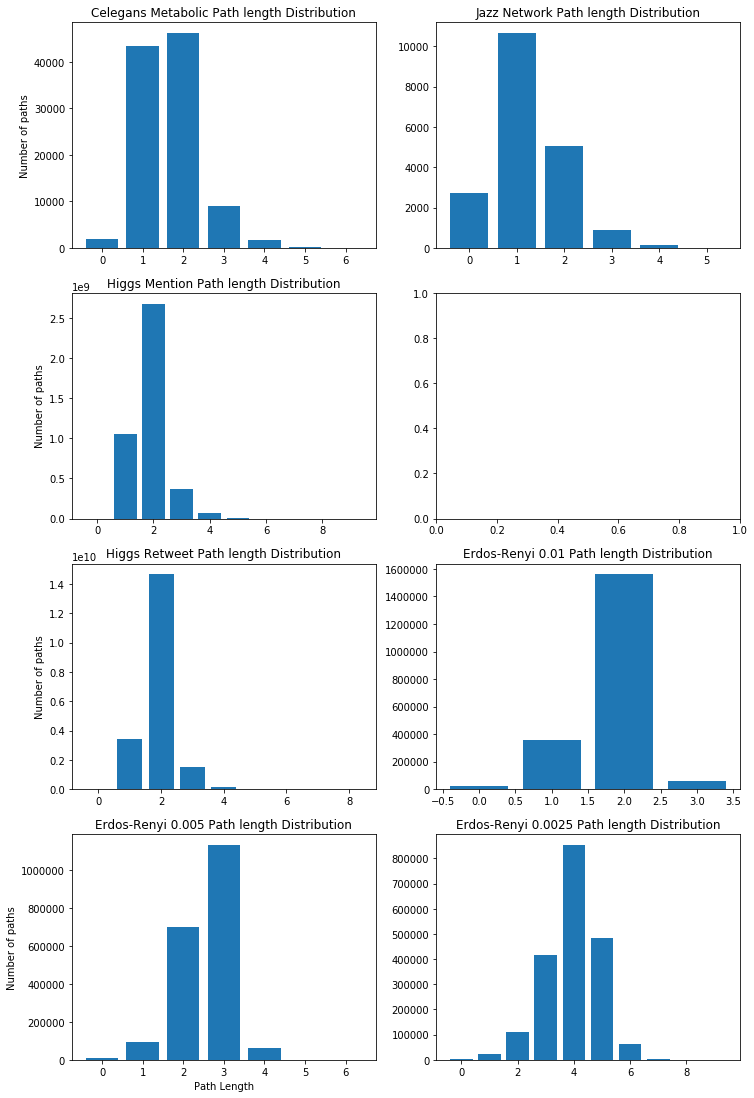

In [391]:
f, arr = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
f.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
arr[0][0].bar(y_c, x_c)
arr[0][0].set_ylabel("Number of paths")
arr[0][0].set_title("Celegans Metabolic Path length Distribution")

arr[0][1].bar(y_j, x_j)
arr[0][1].set_title("Jazz Network Path length Distribution")

arr[1][0].bar(y_hm, x_hm)
arr[1][0].set_ylabel("Number of paths")
arr[1][0].set_title("Higgs Mention Path length Distribution")

arr[1][1].bar(y_hs, x_hs)
arr[1][1].set_title("Higgs Social Path length Distribution")

arr[2][0].bar(y_hr, x_hr)
arr[2][0].set_ylabel("Number of paths")
arr[2][0].set_title("Higgs Retweet Path length Distribution")

arr[2][1].bar(y_e1, x_e1)
arr[2][1].set_title("Erdos-Renyi 0.01 Path length Distribution")

arr[3][0].bar(y_e2, x_e2)
arr[3][0].set_ylabel("Number of paths")
arr[3][0].set_xlabel("Path Length")
arr[3][0].set_title("Erdos-Renyi 0.005 Path length Distribution")

arr[3][1].bar(y_e3, x_e3)
arr[3][0].set_xlabel("Path Length")
arr[3][1].set_title("Erdos-Renyi 0.0025 Path length Distribution")

From the above graphs, we can see that all the network's path length distribution is normally distributed.  

# Analysis of Wikipedia vote network

Wikipedia is a free online encyclopedia which is written by the people who use it. These people are called contributors and out of those contributors some of them are administrators who have access to extra features and are responsible for maintainence. The Wikipedia community issues an RfA (Request for Adminship) to elect a contributor as an administrator through voting. The network we will be analyzing in this section consists of voting data which is a network of nodes and edges. A node in the network is the Wikipedia contributor and a directed edge from node *a* to node *b* indicates that contributor *a* voted for contributor *b*.

The dataset is obtained from [Stanford Network Analysis Project (SNAP) official website](https://snap.stanford.edu/data/wiki-Vote.html).

### Read Graph

In [27]:
graph = Graph.Read_Ncol('wiki-Vote.txt', names=True, directed=True)

### Report statistics for the graph

In [362]:
table = [
    ['Type', graph.is_directed()],
    ['Number of nodes', graph.vcount()],
    ['Number of links', graph.ecount()],
    ['Strongly Connected Components', len(graph.components(mode=STRONG).sizes())],
    ['Weakly Connected Components', len(graph.components(mode=WEAK).sizes())],
    ['Maximum degree', graph.maxdegree()],
    ['Average Path Length', graph.average_path_length()],
    ['Diameter', graph.diameter()],
    ['Average Local Clustering Coefficient', graph.transitivity_avglocal_undirected()],
    ['Average Global Clustering Coefficient', graph.transitivity_undirected()],   
]

In [369]:
table_frame = pd.DataFrame(table, columns=['Statistic', 'Value'])

In [370]:
table_frame

,Statistic,Value
0,Type,True
1,Number of nodes,7115
2,Number of links,103689
3,Strongly Connected Components,5816
4,Weakly Connected Components,24
5,Maximum degree,1167
6,Average Path Length,3.34101
7,Diameter,10
8,Average Local Clustering Coefficient,0.208852
9,Average Global Clustering Coefficient,0.125479


### Degree Distribution

In [28]:
g = graph.degree_distribution(bin_width=1)

In [29]:
x_g = [i[2] for i in list(g.bins())]
y_g = [s * 1.0/g.n for s in x_g]

Text(0.5,1,'Wikipedia Vote Network Degree Distribution')

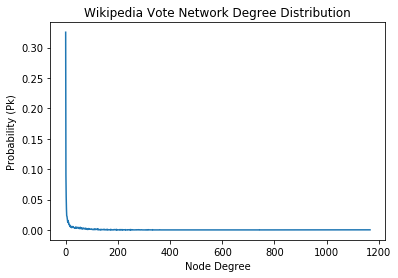

In [30]:
plt.plot(y_g)
plt.ylabel('Probability (Pk)')
plt.xlabel('Node Degree')
plt.title('Wikipedia Vote Network Degree Distribution')

### Path Length Distribution

In [31]:
g = graph.path_length_hist()

In [32]:
x_g = [i[2] for i in list(g.bins())]
y_g = [i for i in range(len(x_g))]

Text(0.5,1,'Wikipedia Vote Network Path Length Distribution')

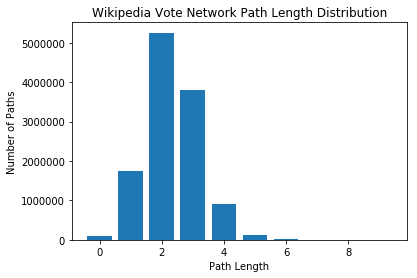

In [33]:
plt.bar(y_g, x_g)
plt.xlabel('Path Length')
plt.ylabel('Number of Paths')
plt.title('Wikipedia Vote Network Path Length Distribution')